<a href="https://colab.research.google.com/github/angelaoica-dev/challenge-AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Exploración inicial de los datos

###Limpiar datos.

In [41]:
# Corregir problemas de encoding
def limpiar_columnas(df):
    df.rename(columns={
        "CategorÃ­a del Producto": "Categoría del Producto",
        "Costo de envÃ­o": "Costo de envío",
        "CalificaciÃ³n": "Calificación",
        "MÃ©todo de pago": "Método de pago"
    }, inplace=True)

for df in [tienda, tienda2, tienda3, tienda4]:
    limpiar_columnas(df)

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("✔ Los datos han sido corrgidos correctamente. ")
print(f"Total de registros: {len(df_tiendas)}")

df_tiendas.head()

✔ Los datos han sido corrgidos correctamente. 
Total de registros: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [42]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [43]:
df_tiendas.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



### Ingreso total de cada tienda.


In [45]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = []

for i, df in enumerate(tiendas, start=1):
    total = df["Precio"].sum()
    ingresos.append(total)
    print(f"Ingreso Total Tienda {i}: ${total:,.2f}")

Ingreso Total Tienda 1: $1,150,880,400.00
Ingreso Total Tienda 2: $1,116,343,500.00
Ingreso Total Tienda 3: $1,098,019,600.00
Ingreso Total Tienda 4: $1,038,375,700.00


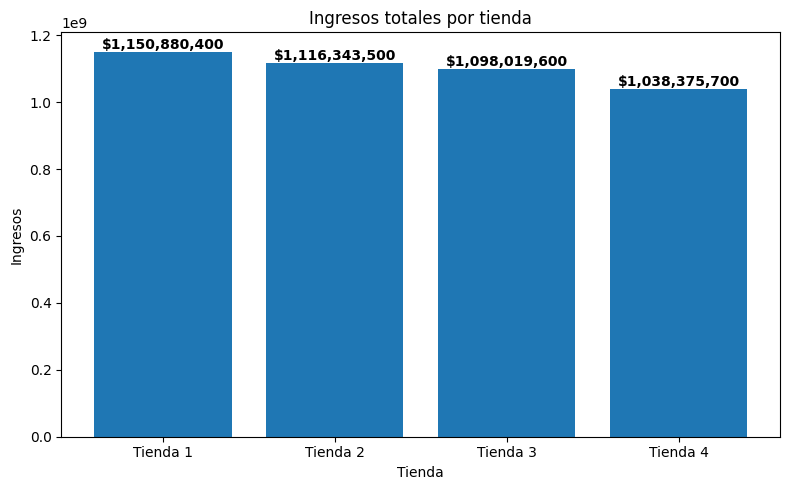

In [46]:
#Comparación directa
ingresos_totales = []
for i, df in enumerate(tiendas, start=1):
    ingresos_totales.append(df['Precio'].sum())

nombres_tiendas = [f'Tienda {i}' for i in range(1, len(tiendas) + 1)]
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos_totales)

plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")

for i, v in enumerate(ingresos_totales):
    plt.text(i, v, f"${v:,.0f}", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

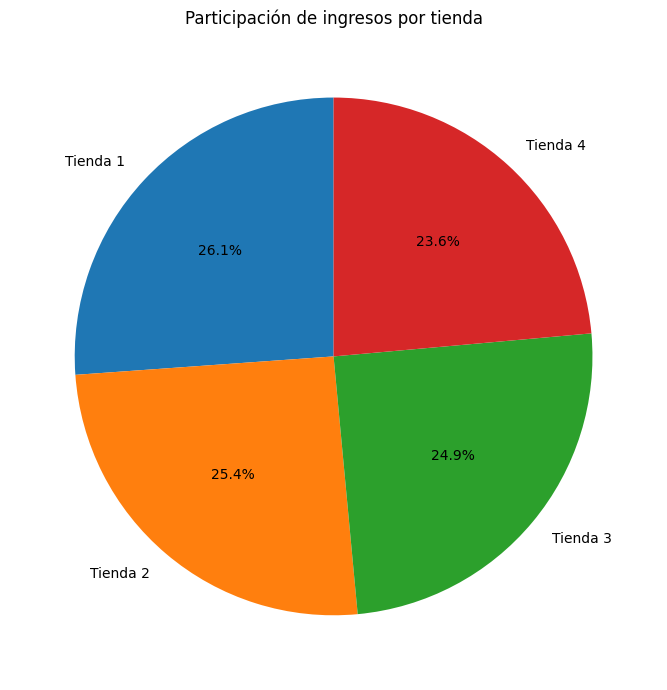

In [47]:
#Participación porcentual
plt.figure(figsize=(7, 7))
plt.pie(
    ingresos_totales,
    labels=nombres_tiendas,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Participación de ingresos por tienda")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [48]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
todas = pd.concat(
    [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
    ignore_index=True
)

# Ventas por categoría y tienda
ventas_categoria_tienda = (
    todas
    .groupby(["Tienda", "Categoría del Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)

tabla_categoria = (
    ventas_categoria_tienda
    .pivot(
        index="Categoría del Producto",
        columns="Tienda",
        values="Cantidad de Ventas"
    )
    .fillna(0)
)

print(tabla_categoria)

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


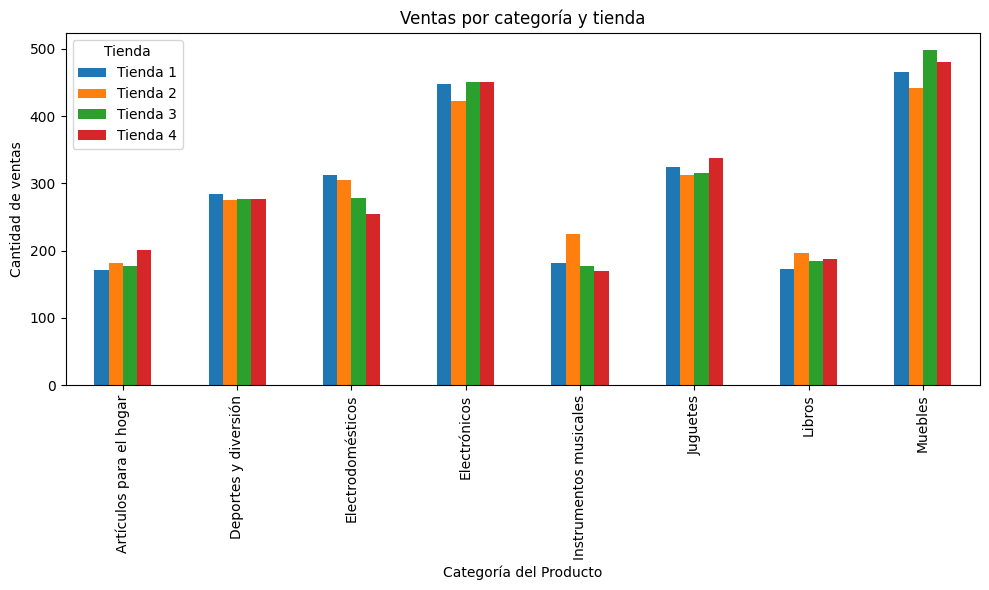

In [49]:
import matplotlib.pyplot as plt

tabla_categoria.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Ventas por categoría y tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [51]:
todas = pd.concat(
    [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
    ignore_index=True
)

calificacion_promedio = (
    todas
    .groupby("Tienda")["Calificación"]
    .mean()
    .round(2)
)

print(calificacion_promedio)

Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


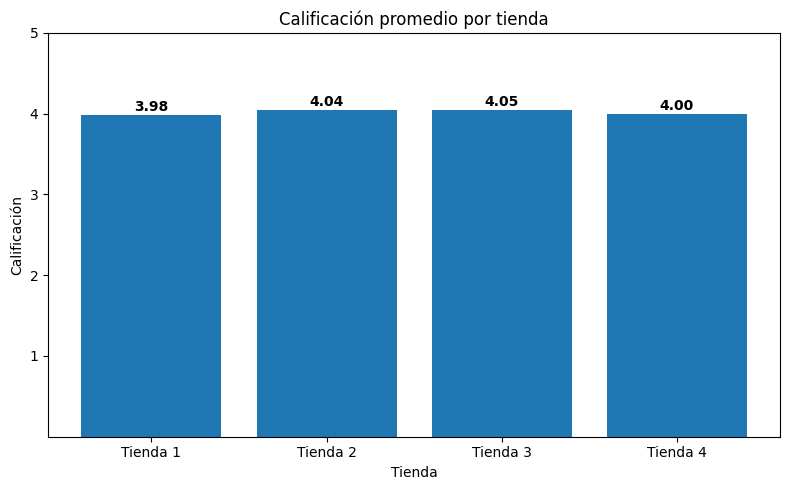

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    calificacion_promedio.index,
    calificacion_promedio.values
)

plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación")
plt.yticks([1, 2, 3, 4, 5])

for i, v in enumerate(calificacion_promedio.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [53]:
def analizar_productos(df, top_n=5):
    conteo = df["Producto"].value_counts()

    return {
        "mas_vendidos": conteo.head(top_n),
        "menos_vendidos": conteo.tail(top_n),
        "producto_mas_vendido": conteo.idxmax(),
        "ventas_mas_vendido": conteo.max(),
        "producto_menos_vendido": conteo.idxmin(),
        "ventas_menos_vendido": conteo.min()
    }

tiendas_dict = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

resumen_productos = []

for nombre, df in tiendas_dict.items():
    resultado = analizar_productos(df, top_n=3)

    print(f"\n📊 {nombre}")

    print("\nProductos MÁS vendidos:")
    print(resultado["mas_vendidos"])

    print("\nProductos MENOS vendidos:")
    print(resultado["menos_vendidos"])

    resumen_productos.append({
        "Tienda": nombre,
        "Producto más vendido": resultado["producto_mas_vendido"],
        "Ventas producto más vendido": resultado["ventas_mas_vendido"],
        "Producto menos vendido": resultado["producto_menos_vendido"],
        "Ventas producto menos vendido": resultado["ventas_menos_vendido"]
    })
df_resumen_productos = pd.DataFrame(resumen_productos)
df_resumen_productos


📊 Tienda 1

Productos MÁS vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

📊 Tienda 2

Productos MÁS vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

📊 Tienda 3

Productos MÁS vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

📊 Tienda 4

Productos MÁS vendidos:
Producto
Cama box                   62
Cubertería                 59
Dashboards con Pow

,Tienda,Producto más vendido,Ventas producto más vendido,Producto menos vendido,Ventas producto menos vendido
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


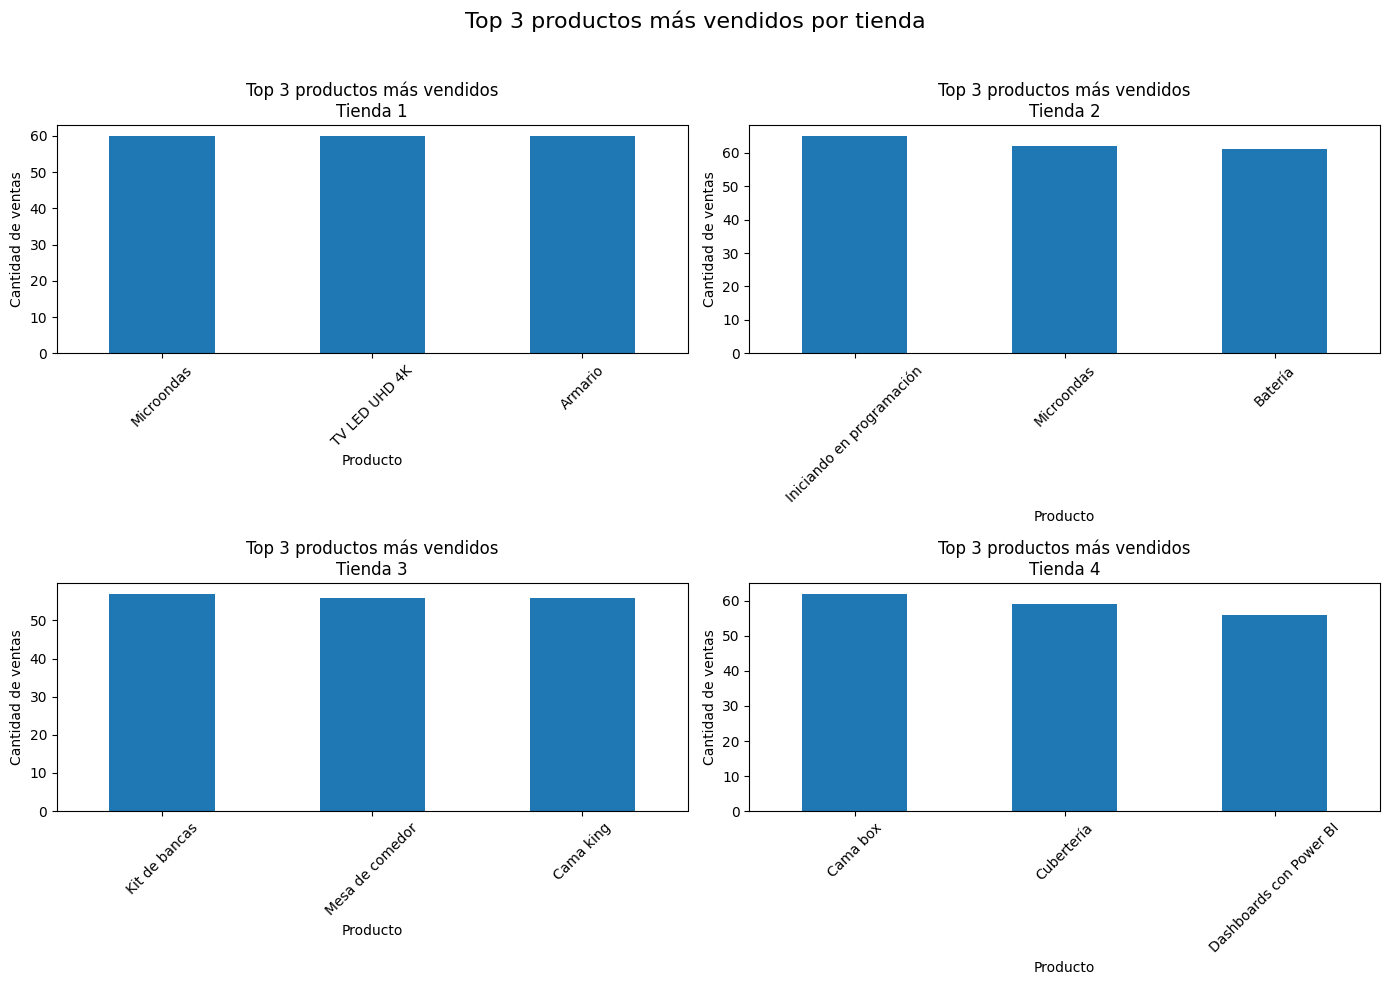

In [54]:
#Productos más vendidos
tiendas_dict = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (nombre, df) in zip(axes, tiendas_dict.items()):
    top_productos = df["Producto"].value_counts().head(3)

    top_productos.plot(kind="bar", ax=ax)
    ax.set_title(f"Top 3 productos más vendidos\n{nombre}")
    ax.set_xlabel("Producto")
    ax.set_ylabel("Cantidad de ventas")
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("Top 3 productos más vendidos por tienda", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

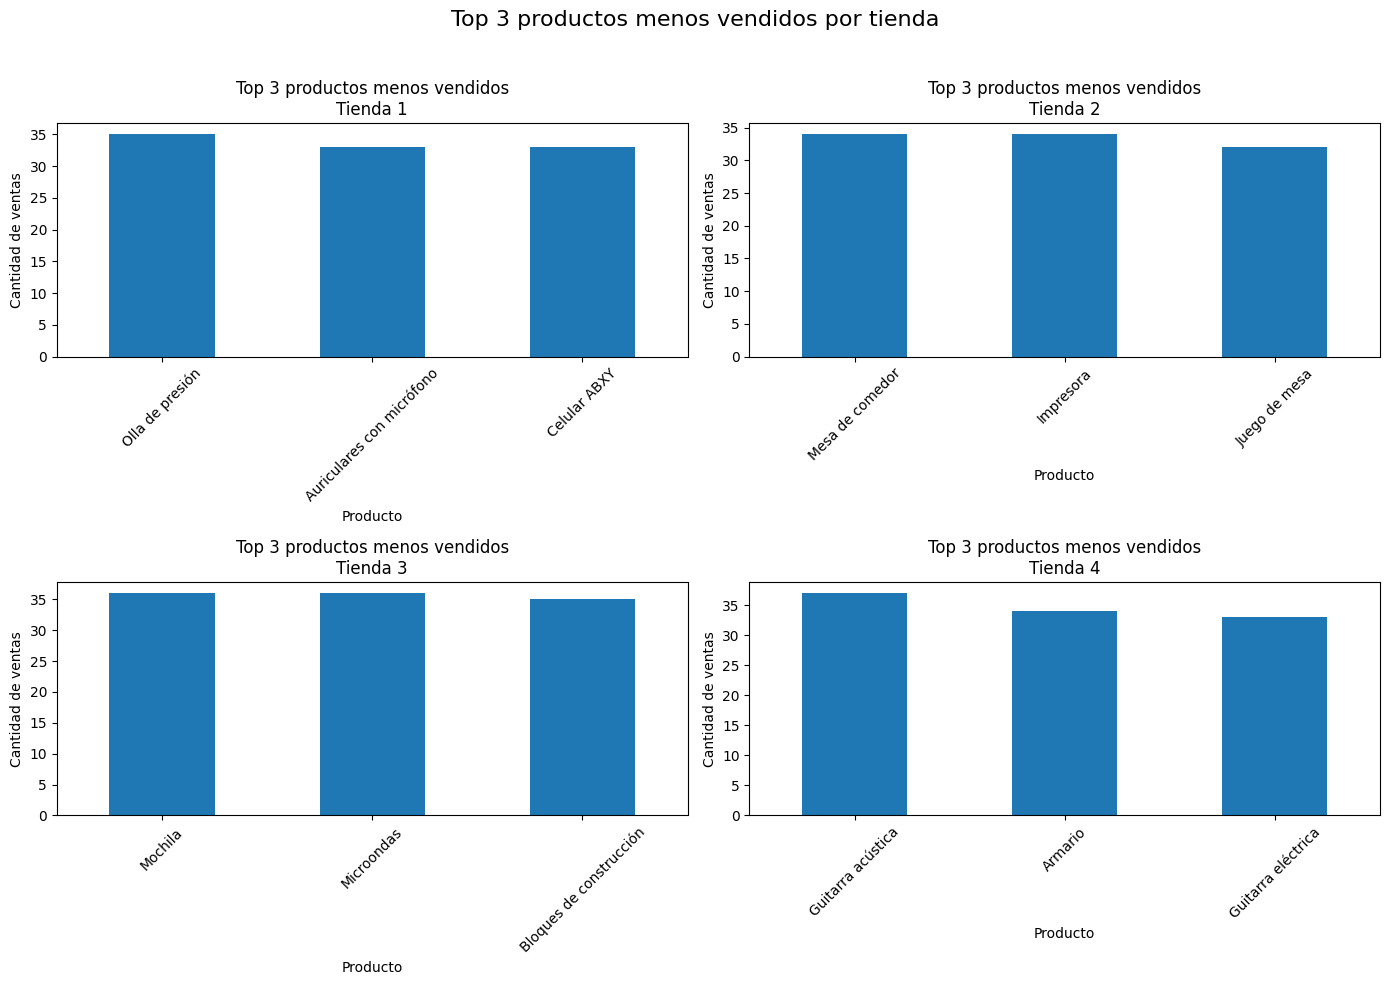

In [55]:
#Productos menos vendidos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (nombre, df) in zip(axes, tiendas_dict.items()):
    menos_vendidos = df["Producto"].value_counts().tail(3)

    menos_vendidos.plot(kind="bar", ax=ax)
    ax.set_title(f"Top 3 productos menos vendidos\n{nombre}")
    ax.set_xlabel("Producto")
    ax.set_ylabel("Cantidad de ventas")
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("Top 3 productos menos vendidos por tienda", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

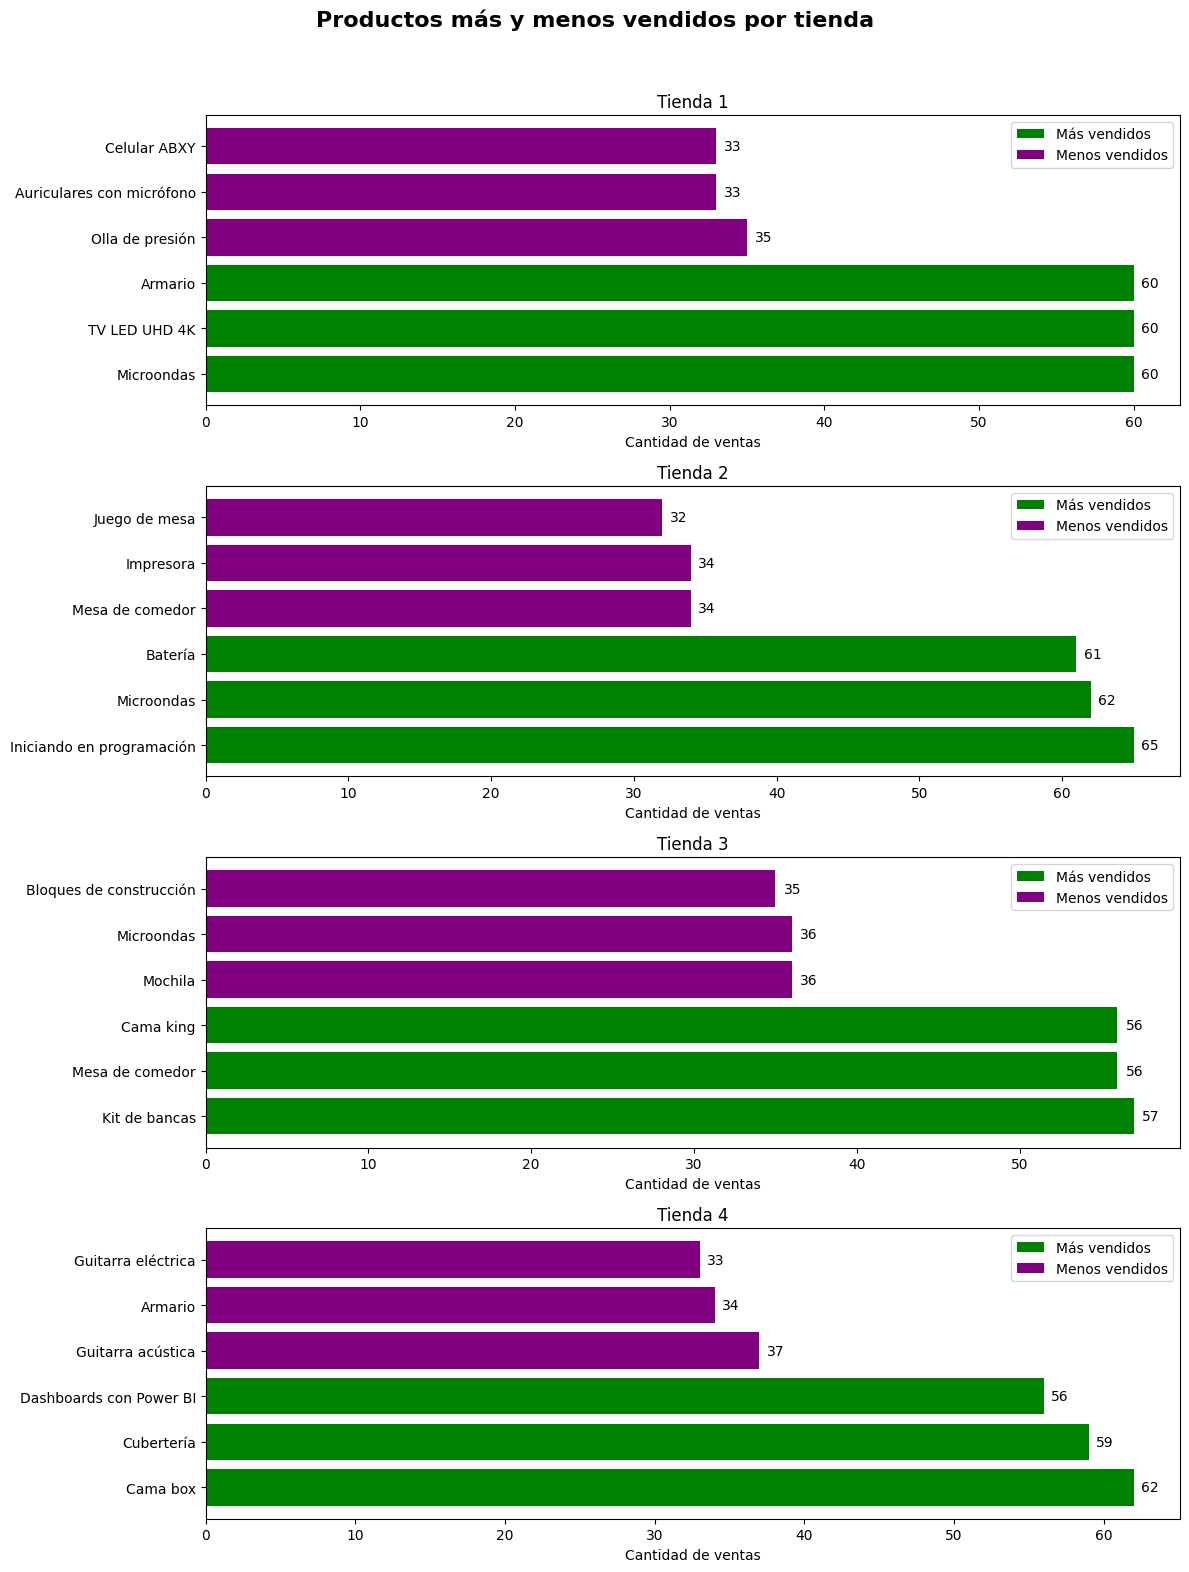

In [56]:
fig, axes = plt.subplots(
    nrows=len(tiendas),
    ncols=1,
    figsize=(12, 4 * len(tiendas))
)

if len(tiendas) == 1:
    axes = [axes]

for ax, (nombre, df) in zip(axes, tiendas.items()):
    resultado = analizar_productos(df, top_n=3)

    mas_vendidos = resultado["mas_vendidos"]
    menos_vendidos = resultado["menos_vendidos"]

    # Barras horizontales
    ax.barh(
        mas_vendidos.index,
        mas_vendidos.values,
        color="green",
        label="Más vendidos"
    )

    ax.barh(
        menos_vendidos.index,
        menos_vendidos.values,
        color="purple",
        label="Menos vendidos"
    )

    # Etiquetas de valores
    for producto, valor in mas_vendidos.items():
        ax.text(valor + 0.5, producto, str(valor), va="center")

    for producto, valor in menos_vendidos.items():
        ax.text(valor + 0.5, producto, str(valor), va="center")

    ax.set_title(nombre)
    ax.set_xlabel("Cantidad de ventas")
    ax.legend()

plt.suptitle(
    "Productos más y menos vendidos por tienda",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 5. Envío promedio por tienda

In [57]:
envio_promedio = (
    pd.concat(
        [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
        ignore_index=True
    )
    .groupby("Tienda")["Costo de envío"]
    .mean()
)
df_envio_promedio = (
    envio_promedio
    .round(2)
    .reset_index(name="Costo promedio")
)
df_envio_promedio

,Tienda,Costo promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


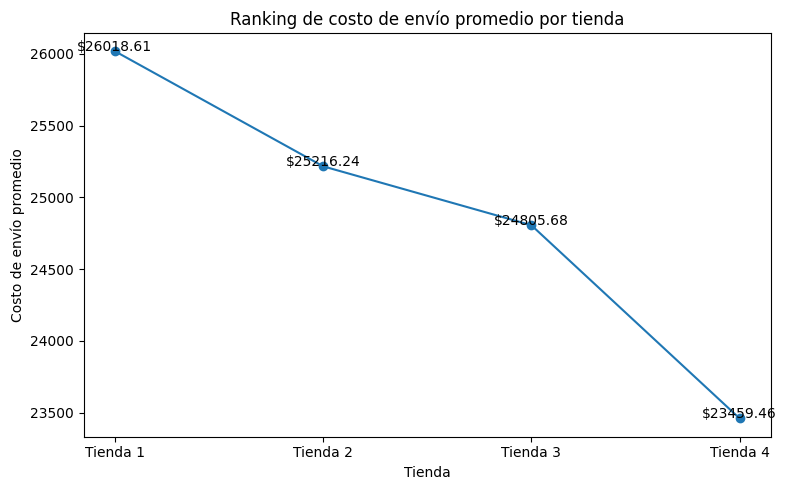

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(
    df_envio_promedio["Tienda"],
    df_envio_promedio["Costo promedio"],
    marker="o"
)

plt.title("Ranking de costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")

for i, v in enumerate(df_envio_promedio["Costo promedio"]):
    plt.text(i, v + 0.3, f"${v:.2f}", ha="center")

plt.tight_layout()
plt.show()

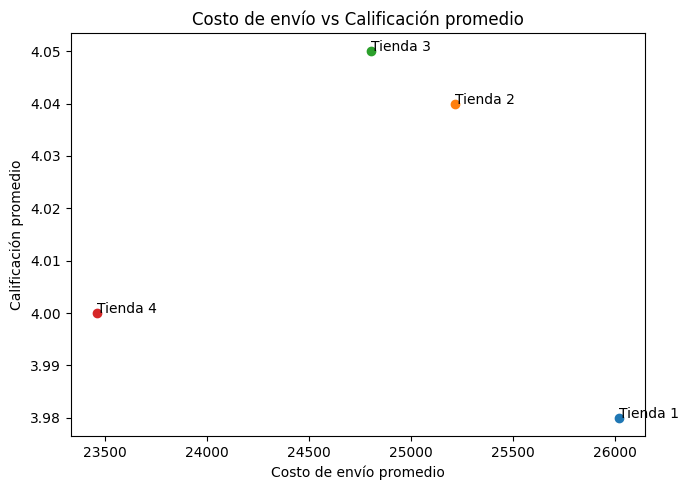

In [59]:
plt.figure(figsize=(7, 5))

for tienda in df_envio_promedio["Tienda"]:
    envio = df_envio_promedio.loc[
        df_envio_promedio["Tienda"] == tienda, "Costo promedio"
    ].values[0]

    calificacion = calificacion_promedio.loc[tienda]

    plt.scatter(envio, calificacion)
    plt.text(envio, calificacion, tienda)

plt.title("Costo de envío vs Calificación promedio")
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")
plt.tight_layout()
plt.show()

### Relación costo-envío

In [60]:
calificacion_promedio = (
    pd.concat(
        [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
        ignore_index=True
    )
    .groupby("Tienda")["Calificación"]
    .mean()
)
print(calificacion_promedio)

Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


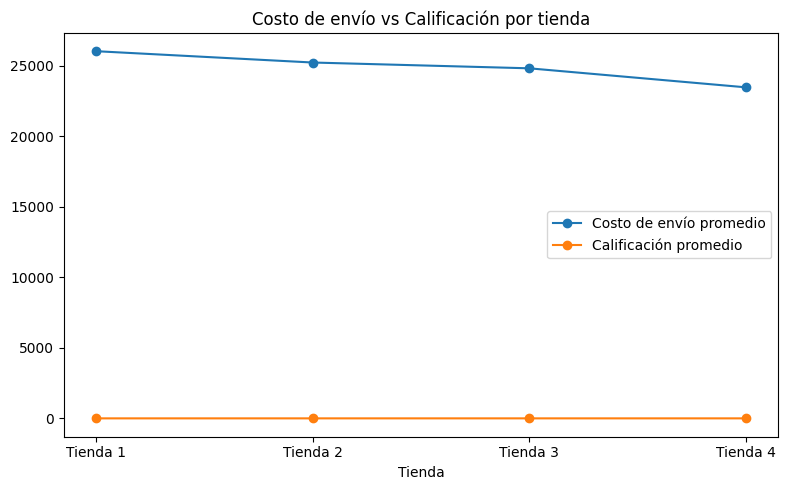

In [61]:
plt.figure(figsize=(8, 5))

plt.plot(
    envio_promedio.index,
    envio_promedio.values,
    marker="o",
    label="Costo de envío promedio"
)

plt.plot(
    calificacion_promedio.index,
    calificacion_promedio.values,
    marker="o",
    label="Calificación promedio"
)

plt.title("Costo de envío vs Calificación por tienda")
plt.xlabel("Tienda")
plt.legend()
plt.tight_layout()
plt.show()

# Informe Final de Análisis de Tiendas  
## Recomendación estratégica para el Sr. Juan

---

## 1. Introducción

El presente análisis tiene como objetivo identificar la tienda más conveniente para que el Sr. Juan comercialice sus productos, a partir de un estudio comparativo de cuatro tiendas.  
El análisis se basa en indicadores clave de desempeño (KPIs) relacionados con ingresos, comportamiento de ventas, satisfacción del cliente y costos logísticos.

Para ello, se analizaron métricas como:
- Ingresos totales por tienda  
- Ventas por categoría de producto  
- Calificación promedio de los clientes  
- Productos más y menos vendidos  
- Costo promedio de envío  

Los resultados se respaldan con visualizaciones que permiten una comparación objetiva del desempeño de cada tienda.

---

##  2. Análisis de Ingresos

El análisis de facturación muestra diferencias claras entre las tiendas:

- **Tienda 1** presenta el mayor ingreso total, con aproximadamente **$1,150,880,400**, posicionándose como líder de ventas.
- **Tienda 2** y **Tienda 3** presentan ingresos competitivos, aunque inferiores.
- **Tienda 4** registra el menor nivel de facturación.

Este resultado indica que la Tienda 1 posee una mayor capacidad de atracción de clientes y volumen de ventas, lo que representa una ventaja estratégica para el Sr. Juan.

---

## 3. Ventas por Categoría de Producto

El análisis de ventas por categoría evidencia patrones:

- Las categorías de **Muebles** y **Electrónicos** concentran el mayor volumen de ventas en todas las tiendas.
- Categorías como **Instrumentos musicales** y **Artículos para el hogar** muestran menor rotación.
- La Tienda 1 destaca por una distribución equilibrada de ventas entre categorías, lo que sugiere una oferta diversificada y estable.

Esto reduce el riesgo comercial y favorece la sostenibilidad del negocio.

---

## 4. Calificación Promedio de los Clientes

En términos de satisfacción del cliente:

- Tienda 3 obtiene la mejor calificación promedio (4.05).
- Tienda 2 presenta una calificación muy cercana (4.04).
- Tienda 1 registra una calificación de 3.98, ligeramente inferior, pero dentro de un rango competitivo.

Aunque no lidera este indicador, la calificación de la Tienda 1 refleja una experiencia del cliente adecuada.

---

## 5. Análisis de Productos

El análisis de productos más y menos vendidos muestra que:

- Cada tienda cuenta con productos claramente destacados en ventas.
- En Tienda 1, el *Microondas* es el producto más vendido, lo que indica una demanda constante.
- La diferencia entre productos más y menos vendidos es moderada, lo que sugiere estabilidad en el comportamiento de compra.

Esto indica una gestión eficiente del portafolio de productos.

---

## 6. Costo Promedio de Envío

El análisis de costos logísticos muestra que:

- La Tiendas 4 y 3 presentan los costos de envío promedio más bajos.
- Tienda 1 registra el costo de envío promedio más alto.

Sin embargo, este mayor costo no ha afectado negativamente su volumen de ventas, lo que sugiere que otros factores, como la variedad de productos y el posicionamiento, compensan este aspecto.

---

## 7. Conclusión y Recomendación Final

Considerando de forma integral todos los indicadores analizados, se recomienda que el Sr. Juan venda sus productos en la Tienda 1.

Esta recomendación se sustenta en:

- Su liderazgo en ingresos totales.
- Una oferta diversificada de productos, con buen desempeño en las categorías más demandadas.
- Un portafolio estable, sin dependencia excesiva de pocos productos.
- Niveles de satisfacción del cliente aceptables y competitivos.

Si bien otras tiendas destacan en indicadores puntuales, ninguna presenta un desempeño tan sólido y consistente en el conjunto de métricas evaluadas como la Tienda 1. Esta tienda representa la opción más robusta y estratégica para el Sr. Juan.
---
